# **Tratamiento de valores ausentes y análisis exploratorio**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Carga de los datos
df = pd.read_pickle('camiones_rendimiento.pkl')
df

,Fecha,Identificador de Camión,Consumo de combustible,Temperatura del Refrigerante,Factor de Carga,RPM,Velocidad
0,2020-04-03,84120100,1-2,95.0,36.0,1489.0,44.0
1,2020-10-07,84120100,1-2,96.0,41.0,1510.0,43.0
2,2020-12-18,84120100,.50-1,93.0,60.0,1487.0,NaN
3,2020-12-27,84120100,2-3,90.0,59.0,1459.0,39.0
4,2020-08-23,84120100,2-3,101.0,23.0,1566.0,48.0
...,...,...,...,...,...,...,...
99995,2020-11-29,99960100,1-2,98.0,49.0,1456.0,51.0
99996,2020-10-27,99960100,2-3,107.0,25.0,1529.0,60.0
99997,2020-12-03,99960100,.50-1,95.0,44.0,1415.0,52.0
99998,2020-11-18,99960100,.50-1,97.0,53.0,1332.0,36.0


## Al revisar el tipo de los distintos campos del dataframe, se observa que la variable **Identificador de Camión** fue clasificada como numérica, de tipo entero. Sin embargo, esta variable es categórica, de escala de medición nominal, por lo que debería ser de tipo `str`.

## De la misma manera, **Fecha** fue identificada como un objeto de Python, mientras que convendría considerarla de tipo `datetime`.

## Por lo anterior, ambas variables fueron transformadas a los tipos convenientes.



In [ ]:
# Tipos de las variables
df.dtypes

Fecha                            object
Identificador de Camión           int64
Consumo de combustible           object
Temperatura del Refrigerante    float64
Factor de Carga                 float64
RPM                             float64
Velocidad                       float64
dtype: object

In [ ]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%Y-%m-%d')
df['Identificador de Camión'] = df['Identificador de Camión'].astype(str)
df.dtypes

Fecha                           datetime64[ns]
Identificador de Camión                 object
Consumo de combustible                  object
Temperatura del Refrigerante           float64
Factor de Carga                        float64
RPM                                    float64
Velocidad                              float64
dtype: object

## **Valores atípicos**

## Se revisó de forma general la existencia de valores atípicos en las distintas variables numéricas del conjunto de datos.
## Viendo los valores de los diversos percentiles para las distintas variables numéricas, no se observa pérdida de generalidad de los datos considerando los valores mínimos y máximos. Tampoco se identifica a partir de la observación de los histogramas de cada una de estas variables.

In [ ]:
df.describe(percentiles=np.arange(.05,1,.05))

,Temperatura del Refrigerante,Factor de Carga,RPM,Velocidad
count,98004.000000,100000.000000,95040.000000,86105.000000
mean,96.074221,45.770580,1462.314625,43.425086
std,4.679033,12.224932,83.269219,9.187685
min,80.000000,0.000000,1100.000000,10.000000
5%,90.000000,25.000000,1321.000000,29.000000
10%,91.000000,30.000000,1351.000000,32.000000
15%,92.000000,33.000000,1371.000000,34.000000
20%,92.000000,35.000000,1389.000000,35.000000
25%,93.000000,37.000000,1404.000000,37.000000
30%,93.000000,39.000000,1417.000000,38.000000


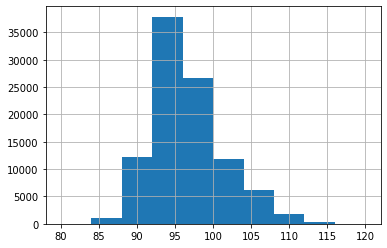

In [ ]:
df['Temperatura del Refrigerante'].hist()

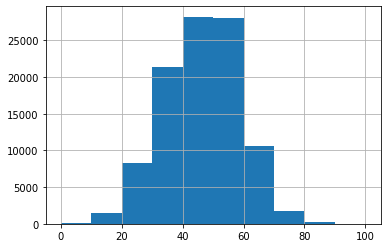

In [ ]:
df['Factor de Carga'].hist()

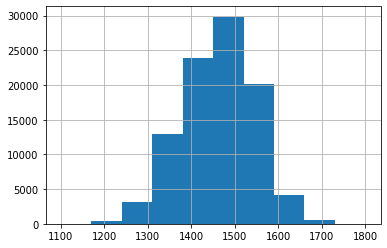

In [ ]:
df['RPM'].hist()

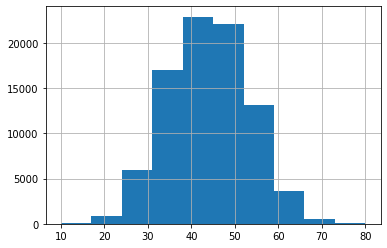

In [ ]:
df['Velocidad'].hist()

## **Valores ausentes**
## Observando la proporción de valores ausentes para las distintas variables, se considera que el único campo para el que es conveniente realizar un tratamiento de imputación es Velocidad, que muestra alrededor de un 14% de nulos. RPM y Temperatura del Refrigerante mostraron únicamente 5 y 2% de valores ausentes, respectivamente.

In [ ]:
# Se muestra la proporción de valores nulos para cada campo
df.isnull().sum()/df.shape[0]

Fecha                           0.00000
Identificador de Camión         0.00000
Consumo de combustible          0.00000
Temperatura del Refrigerante    0.01996
Factor de Carga                 0.00000
RPM                             0.04960
Velocidad                       0.13895
dtype: float64

# **Tratamiento de valores ausentes para la variable Velocidad**

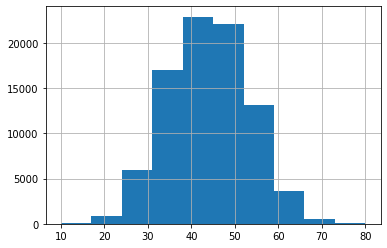

In [ ]:
# Distribución de frecuencias de Velocidad
df['Velocidad'].hist()

In [ ]:
!pip install fitter

     |████████████████████████████████| 51kB 3.0MB/s 
  Created wheel for fitter: filename=fitter-1.3.0-cp37-none-any.whl size=24742 sha256=d52185c6916efcce9930b8fb4a527c37f7049517032f548a9203cb02286af793
  Stored in directory: /root/.cache/pip/wheels/80/d8/0f/3dba85fa574e0e489ca900bb0055d3394c103ae46210d04945
  Created wheel for easydev: filename=easydev-0.11.0-cp37-none-any.whl size=64244 sha256=e4f564c0738d0bdc4bc5a4d4f5a7d3d3aba7fa7fc19eac369a5cc7a969621a2d
  Stored in directory: /root/.cache/pip/wheels/17/69/b5/771949d8100a30aa33e4bc5d0ff77eced9063284891ce26898
Successfully built fitter easydev


In [ ]:
from fitter import Fitter

## Dada la forma de la distribución de frecuencias de los datos, se comparó el ajuste de las siguientes distribuciones:
- Normal
- Gamma
- t de Student
- Beta
- Weibull

In [ ]:
# Lista de distribuciones disponibles
from fitter import get_distributions
get_distributions()

['alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'frechet_l',
 'frechet_r',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'geninvgauss',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwobign',
 'laplace',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'loguniform',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3',
 'powerlaw',
 'powerlognorm',
 'powernorm

### **Normal, Gamma, t de Student y Beta**

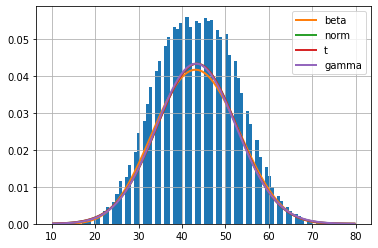

In [ ]:
# Ajuste de las distribuciones:
f1 = Fitter(df['Velocidad'].dropna(), distributions=['norm','gamma', 't', 'beta'])
f1.fit()
summary_ngtb = f1.summary()

## **Weibull**

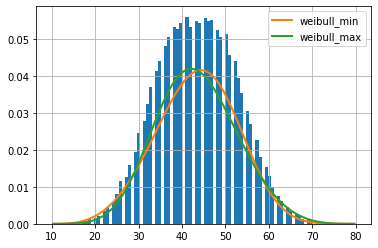

In [ ]:
# Ajuste de las distribuciones:
f2 = Fitter(df['Velocidad'].dropna(), distributions=['weibull_min', 'weibull_max'])
f2.fit()
summary_wei = f2.summary()

## La distribución Beta fue identificada como el mejor modelo para los datos de Velocidad a partir de la suma del error cuadrático y el criterio Bayesiano.

In [ ]:
# Dataframe con los criterios de ajuste para los distintos modelos probabilísticos:
comp_dist = summary_ngtb.append(summary_wei)
comp_dist.sort_values('bic')

,sumsquare_error,aic,bic,kl_div
beta,0.018529,1204.202326,-1.321818e+06,inf
weibull_min,0.018597,1191.996347,-1.321512e+06,inf
weibull_max,0.018651,1185.912061,-1.321262e+06,inf
norm,0.018692,1117.984524,-1.321087e+06,inf
t,0.018692,1120.019156,-1.321074e+06,inf
gamma,0.018693,1117.897228,-1.321067e+06,inf


In [ ]:
# Parámetros de la distribución Beta a partir de los datos de Velocidad:
params = f1.fitted_param['beta']

## *Imputación de valores en la variable Velocidad*

In [ ]:
from scipy.stats import beta
dist  = beta(*params)

In [ ]:
# Número total de valores nulos a imputar
velocidad_nulos = df['Velocidad'].isnull().sum()
velocidad_nulos

13895

In [ ]:
# Imputación de valores utilizando la distribución normal
velocidad_ajuste = df[['Velocidad']].copy()
velocidad_ajuste.loc[velocidad_ajuste['Velocidad'].isnull(),'Velocidad']=dist.rvs(size=velocidad_nulos)

# Corroboración de imputación
velocidad_ajuste['Velocidad'].isnull().sum()

0

In [ ]:
# datos con imputación
velocidad_ajuste.rename(columns={'Velocidad':'Velocidad_ajuste'}, inplace=True)
velocidad_ajuste

,Velocidad_ajuste
0,44.000000
1,43.000000
2,35.431825
3,39.000000
4,48.000000
...,...
99995,51.000000
99996,60.000000
99997,52.000000
99998,36.000000


In [ ]:
df_ajustes = pd.concat([df, velocidad_ajuste], axis=1, join="inner")
df_ajustes

,Fecha,Identificador de Camión,Consumo de combustible,Temperatura del Refrigerante,Factor de Carga,RPM,Velocidad,Velocidad_ajuste
0,2020-04-03,84120100,1-2,95.0,36.0,1489.0,44.0,44.000000
1,2020-10-07,84120100,1-2,96.0,41.0,1510.0,43.0,43.000000
2,2020-12-18,84120100,.50-1,93.0,60.0,1487.0,NaN,35.431825
3,2020-12-27,84120100,2-3,90.0,59.0,1459.0,39.0,39.000000
4,2020-08-23,84120100,2-3,101.0,23.0,1566.0,48.0,48.000000
...,...,...,...,...,...,...,...,...
99995,2020-11-29,99960100,1-2,98.0,49.0,1456.0,51.0,51.000000
99996,2020-10-27,99960100,2-3,107.0,25.0,1529.0,60.0,60.000000
99997,2020-12-03,99960100,.50-1,95.0,44.0,1415.0,52.0,52.000000
99998,2020-11-18,99960100,.50-1,97.0,53.0,1332.0,36.0,36.000000


## Considerando la forma de la distribución de frecuencias de la variable Velocidad, junto con la semejanza entre sus valores de media y mediana, la imputación podría llevarse a cabo a partir de la **media**. Lo anterior es apoyado al constatar que la distribución normal es uno de los modelos que mejor se ajusta a los datos de Velocidad. Sin embargo, se optó por la imputación de valores basados en la **distribución de probabilidad Beta** para que la distribución de frecuencias de los datos se conservara de mejor forma.

# **Análisis exploratorio**
## Se muestra la correlación entre las distintas variables.
## Los valores de correlación más altos fueron encontrados para las siguientes parejas de variables:
- ### RPM - Temperatura del refrigerante
- ### Velocidad - Temperatura del refrigerante


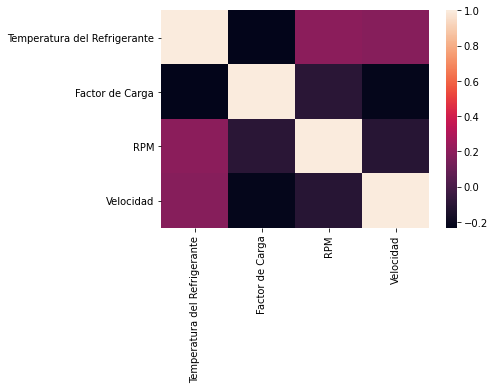

In [ ]:
# Diagrama de correlación entre las distintas variables
sns.heatmap(df.corr())

## Al realizar un diagrama de dispersión de las variables Velocidad y RPM es más notorio por qué es que no se detectó una correlación entre ambas variables.

## Asimismo, el diagrama de dispersión entre Velocidad y Temperatura del Refrigerante muestra una correlación lineal muy débil entre las variables, tal como se observó en el mapa de calor anterior.

## Se esperan comportamientos similares de los cruces restantes entre las variables restantes.

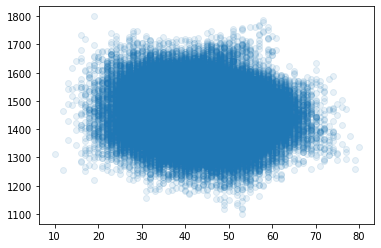

In [ ]:
plt.scatter(df['Velocidad'], df['RPM'], alpha=0.1)

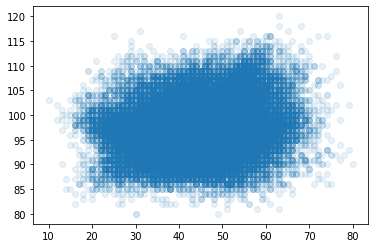

In [ ]:
plt.scatter(df['Velocidad'], df['Temperatura del Refrigerante'], alpha=0.1)

## Al hacer un conteo de los distintos valores del campo Consumo de combustible no se detectaron anomalías o posibles errores.

In [ ]:
# Hay 366 fechas distintas
df['Fecha'].nunique()

366

In [ ]:
# Los registros son solo del año 2020
pd.DatetimeIndex(df['Fecha']).year.unique()

Int64Index([2020], dtype='int64', name='Fecha')

In [ ]:
# No se encuentran anomalías en cuanto al conteo de registros por mes del año
pd.DatetimeIndex(df['Fecha']).month.value_counts()

10    8568
12    8565
5     8552
7     8496
1     8373
8     8360
4     8327
11    8314
3     8245
6     8144
9     8095
2     7961
Name: Fecha, dtype: int64

In [ ]:
# Agregar campo de Mes al Dataframe

# Obtener el mes de cada fecha (Se obtienen como índices)
month = pd.DatetimeIndex(df['Fecha']).month
# Convertir el índice en una serie
month = month.to_series()
# Resetear el índice para hacer al campo compatible con el Dataframe original
month = month.reset_index(drop=True)
# Cambiar nombre a la serie, de Fecha a Mes
month.name = 'Mes'

df_ajustes = pd.concat([df_ajustes, month], axis=1, join="inner")
df_ajustes

,Fecha,Identificador de Camión,Consumo de combustible,Temperatura del Refrigerante,Factor de Carga,RPM,Velocidad,Velocidad_ajuste,Mes
0,2020-04-03,84120100,1-2,95.0,36.0,1489.0,44.0,44.000000,4
1,2020-10-07,84120100,1-2,96.0,41.0,1510.0,43.0,43.000000,10
2,2020-12-18,84120100,.50-1,93.0,60.0,1487.0,NaN,35.431825,12
3,2020-12-27,84120100,2-3,90.0,59.0,1459.0,39.0,39.000000,12
4,2020-08-23,84120100,2-3,101.0,23.0,1566.0,48.0,48.000000,8
...,...,...,...,...,...,...,...,...,...
99995,2020-11-29,99960100,1-2,98.0,49.0,1456.0,51.0,51.000000,11
99996,2020-10-27,99960100,2-3,107.0,25.0,1529.0,60.0,60.000000,10
99997,2020-12-03,99960100,.50-1,95.0,44.0,1415.0,52.0,52.000000,12
99998,2020-11-18,99960100,.50-1,97.0,53.0,1332.0,36.0,36.000000,11


In [ ]:
# No se notan diferencias importantes al agrupar por mes
df_mes = df_ajustes.groupby(['Mes']).agg({'Velocidad': ['std', 'mean', 'median'],
                                          'RPM':['std', 'mean', 'median'],
                                          'Temperatura del Refrigerante': ['std', 'mean', 'median']})
df_mes

Velocidad                    ... Temperatura del Refrigerante                  
          std       mean median  ...                          std       mean median
Mes                              ...                                               
1    9.131888  43.407680   43.0  ...                     4.596913  96.089490   95.0
2    9.176371  43.458625   43.0  ...                     4.610780  96.057406   95.0
3    9.189858  43.446383   43.0  ...                     4.652731  96.070696   95.0
4    9.075519  43.650237   44.0  ...                     4.673931  96.095768   95.0
5    9.174015  43.318188   43.0  ...                     4.702162  95.959909   95.0
6    9.164473  43.285408   43.0  ...                     4.666946  96.053706   95.0
7    9.275905  43.460074   44.0  ...                     4.730968  96.103047   95.0
8    9.107814  43.410535   43.0  ...                     4.646337  96.102711   95.0
9    9.171236  43.231502   43.0  ...                     4.724845  96.086035   95.0
10   9.374444  43.342768   43.0  ...                     4.717737  96.135142   95.0
11   9.184593  43.412330   43.0  ...                     4.736251  96.071587   95.0
12   9.210670  43.665362   44.0  ...                     4.682857  96.064955   95.0

[12 rows x 9 columns]

In [ ]:
df['Consumo de combustible'].value_counts()

.50-1    44761
2-3      24960
1-2      15060
0-.50    10069
+3        5150
Name: Consumo de combustible, dtype: int64

In [ ]:
df_consumo = df.groupby(['Consumo de combustible']).agg({'Velocidad': ['std', 'mean', 'median'],
                                                         'RPM':['std', 'mean', 'median'],
                                                         'Temperatura del Refrigerante': ['std', 'mean', 'median']})
df_consumo
# El mayor consumo se presenta con una menor velocidad promedio.

Velocidad             ... Temperatura del Refrigerante       
                             std       mean  ...                         mean median
Consumo de combustible                       ...                                    
+3                      5.363194  37.750056  ...                   100.624528  101.0
.50-1                   9.180430  43.400390  ...                    94.064615   94.0
0-.50                   8.300347  43.428143  ...                   100.753848  101.0
1-2                     9.967647  43.416367  ...                    94.150938   94.0
2-3                     9.230123  44.641977  ...                    98.016731   98.0

[5 rows x 9 columns]

In [ ]:
df['Identificador de Camión'].nunique()

100

In [ ]:
# Todos los camiones tienen 1000 registros
df['Identificador de Camión'].value_counts(sort=True)

96280100    1000
92760100    1000
94360100    1000
95480100    1000
90200100    1000
            ... 
95160100    1000
98200100    1000
91480100    1000
96920100    1000
95000100    1000
Name: Identificador de Camión, Length: 100, dtype: int64

In [ ]:
df_camiones = df.groupby(['Identificador de Camión']).agg({'Velocidad': ['std', 'mean', 'median'],
                                                           'RPM':['std', 'mean', 'median'],
                                                           'Temperatura del Refrigerante': ['std', 'mean', 'median']})
df_camiones

Velocidad             ... Temperatura del Refrigerante       
                              std       mean  ...                         mean median
Identificador de Camión                       ...                                    
84120100                 9.301336  43.759107  ...                    96.187564   95.0
84280100                 8.959451  43.583432  ...                    96.130964   95.0
84440100                 8.783433  43.319908  ...                    96.051020   95.0
84600100                 9.229536  43.861872  ...                    96.363174   96.0
84760100                 9.372624  43.750572  ...                    96.117828   95.0
...                           ...        ...  ...                          ...    ...
99320100                 9.373779  43.300349  ...                    96.023517   95.0
99480100                 9.073092  42.927315  ...                    95.875256   95.0
99640100                 9.106214  43.960648  ...                    95.938776   95.0
99800100                 9.158997  43.823256  ...                    95.951170   95.0
99960100                 9.056998  43.570608  ...                    95.887424   95.0

[100 rows x 9 columns]

In [ ]:
df_camiones['RPM']['mean'].sort_values(ascending=False)

Identificador de Camión
87960100    1468.735632
94360100    1468.242171
88760100    1466.976621
91320100    1466.954737
87480100    1466.703426
               ...     
93240100    1457.909948
90040100    1457.750000
95960100    1457.120798
96440100    1456.846800
97240100    1456.840812
Name: mean, Length: 100, dtype: float64